# Principal Component Analysis

This script applies PCA to the 508x4096 feature set in order to reduce the dimensions. It finds the number of principal components (PCs) to use for the remainder of the project as the first 6 (6PCs) and 18 (18PCs) principal components.

## Load the needed packages

In [28]:
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
TITLE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE) 

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'


In [29]:
BASE_DIR = '../..'
DATA_DIR = os.path.join(BASE_DIR, 'data')
FEATURES_DIR = os.path.join(DATA_DIR, 'extracted_features')

## Load feature set

In [30]:
# read in data from csv file
df = pd.read_csv(os.path.join(FEATURES_DIR, "all_features.csv")) # feature set for 508 gauteng wards
df_labels = df.drop(df.columns[3:4099], axis=1) # creating labels for csv file later on
df_labels = df_labels.drop(df_labels.columns[0], axis=1)

df = df.drop([df.columns[0],"Municipality","ward_no."], axis=1) # remove columns that serve as index and naming columns
df.head()

df.shape # the dataframe is 508 rows (wards) and 4096 columns (features)

(508, 4096)

## Calculate first 508 PCs

Begin by visualising the first 508 PCs*. 

*Note that the current PCA function does not allow to fit more than 508 PCs.

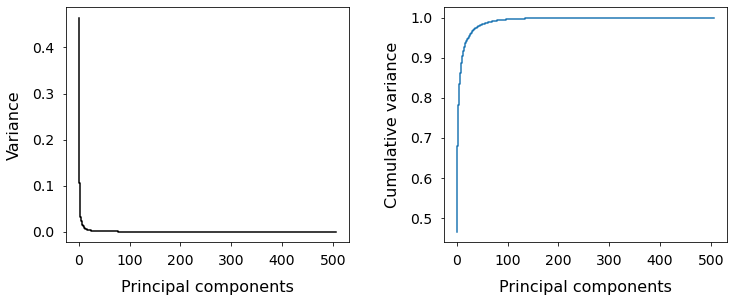

In [31]:
# Create a PCA instance: pca1
pca1 = PCA(n_components=508) # create 508 PC's
principalComponents1 = pca1.fit_transform(df) # apply the pc's to the feature set

# Plot the explained variances
features1 = range(pca1.n_components_)

# Save components to a DataFrame
PCA_components1 = pd.DataFrame(principalComponents1)

# compute cumulative variance explained by PCs
var_explained1 = pca1.explained_variance_ratio_
cumulative_var_explained1 = var_explained1.cumsum()

var_df = pd.DataFrame(var_explained1)
var_df.columns = ["Variance Explained"]

# plot variance explained by ith PC
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.step(features1,pca1.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

# plot cumulative variance explained up to and including the ith PC
plt.subplot(1,2,2)
plt.step(features1,cumulative_var_explained1)
plt.ylabel("Cumulative variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

plt.tight_layout(pad=3.0)
# plt.savefig("variance_508.pdf") #save the plot to pdf

## Save PCs to csv
Save these PCs to a csv for later use.

In [32]:
PCA_components1 = pd.concat([df_labels, pd.DataFrame(principalComponents1)], axis=1, sort=False)
PCA_components1.head()

,ward_no.,Municipality,0,1,2,3,4,5,6,7,...,498,499,500,501,502,503,504,505,506,507
0,1,Emfuleni,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,...,-0.017264,0.001217,0.004934,-0.005022,0.002028,0.012065,0.008158,-0.004625,-0.004246,4.805662e-15
1,2,Emfuleni,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,...,-0.000131,-0.000230,0.001535,0.002680,0.001170,-0.000115,-0.001599,0.000846,-0.000555,4.805662e-15
2,3,Emfuleni,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,...,-0.004985,0.002332,-0.001653,-0.003120,0.000471,0.000672,-0.001676,-0.000250,-0.002484,4.805662e-15
3,4,Emfuleni,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,...,0.005413,0.007550,0.006791,0.001223,0.001422,-0.001028,0.002100,-0.004409,0.001264,4.805662e-15
4,5,Emfuleni,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,...,0.003730,-0.003468,-0.001350,-0.003448,-0.000976,0.002545,0.002290,0.002642,-0.004992,4.805662e-15


In [33]:
# write to csv
PCA_components1.to_csv('principal_components.csv', index=False)

## Visualise 150PCs and 50PCs

Plot first 150 and 50 PCs to better inform the choice of number of PCs to use.

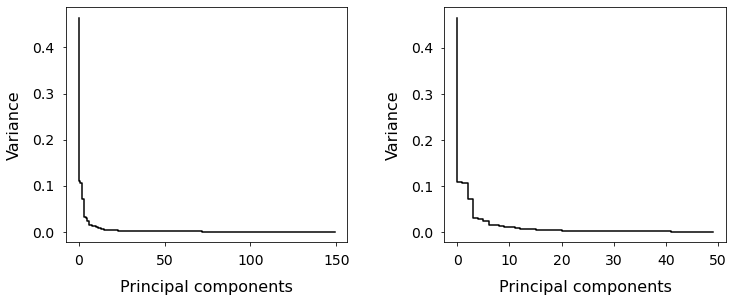

In [6]:
# Create a PCA instance: pca
pca150 = PCA(n_components=150) # create 150 PC's
pca50 = PCA(n_components=50) # create 50 PC's

principalComponents150 = pca150.fit_transform(df) # apply the first 150 pc's to the feature set
principalComponents50 = pca50.fit_transform(df) # apply the first 50 pc's to the feature set

features150 = range(pca150.n_components_) # x-axis label
features50 = range(pca50.n_components_) # x-axis label

plt.figure(figsize=(11, 5))
# plot 150PCs
ax = plt.subplot(1,2,1)
plt.step(features150,pca150.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

# plot 50PCs
plt.subplot(1,2,2)
plt.step(features50,pca50.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

plt.tight_layout(pad=3.0)
# plt.savefig("variance_150_50.pdf") # save the plot to pdf

### A closer look at variance explained
The following plot indicates the cumulative variance explained at different points. The points are chosen where there seems to be an elbow in the graph.

Text(41.5, 0.27, '$\\lambda_{40}$')

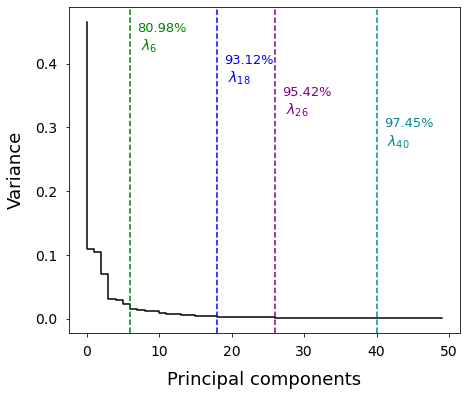

In [7]:
plt.figure(figsize=(7, 6))
plt.step(features50, pca50.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=18, labelpad=10)
plt.xlabel("Principal components", fontsize=18, labelpad=12)
plt.grid(False)
plt.axvline(x=6, color="green",ls="--")
plt.axvline(x=18, color="blue",ls="--")
plt.axvline(x=26, color="purple",ls="--")
plt.axvline(x=40, color="darkcyan",ls="--")

# Add text to show number of PCs and cumulative variance explained
plt.text(7, 0.45, "80.98%", color="green", fontsize=13)
plt.text(19, 0.4, "93.12%", color="blue", fontsize=13)
plt.text(27, 0.35, "95.42%", color="purple", fontsize=13)
plt.text(41, 0.3, "97.45%", color="darkcyan", fontsize=13)

plt.text(7.5, 0.42, r'$\lambda_{6}$', color="green", fontsize=14)
plt.text(19.5, 0.37, r'$\lambda_{18}$', color="blue", fontsize=14)
plt.text(27.5, 0.32, r'$\lambda_{26}$', color="purple", fontsize=14)
plt.text(41.5, 0.27, r'$\lambda_{40}$', color="darkcyan", fontsize=14)

# plt.savefig("50_pc_var_indicated.pdf") # save plot to pdf

### Variance explained by 6PCs, 18PCs, 26PCs and 40PCs

Cumulative variance explained by the above number of principal components. For the K-means and HDBSCAN clustering algorithms both 6PCs and 18PCs will be used for comparison.

In [8]:
a = np.array(cumulative_var_explained1)
indeces = [5,17,25,39]
print ([a[i] for i in indeces])

[0.8097702877147489, 0.9312303882587317, 0.9542216623222977, 0.9745114672330673]
